In [14]:
import os
%pwd

'd:\\MLOps Projects\\StellarClassifierOps\\research'

In [15]:
os.chdir("../")
%pwd

'd:\\MLOps Projects\\StellarClassifierOps'

In [16]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

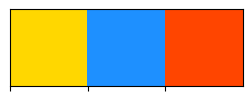

In [17]:
# custom color palette
my_colors = ['#FFD700', '#1E90FF', '#FF4500'] 

# Plot Color Palletes
sns.palplot(my_colors)

## Data Exploration

In [33]:
import pandas as pd 

data=pd.read_csv("artifacts/data_ingestion/star_classification.csv")
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [34]:
# Display basic information 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

There is no null value, and all features except class are numeric.

In [35]:
print(data.duplicated().sum())

0


In [36]:
data.shape

(100000, 18)

In [37]:
# Display summary statistics for numerical features
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [38]:
data.nunique().sort_values()

rerun_ID            1
class               3
cam_col             6
run_ID            430
field_ID          856
fiber_ID         1000
MJD              2180
plate            6284
obj_ID          78053
r               91901
z               92007
i               92019
g               92651
u               93748
redshift        99295
delta           99999
alpha           99999
spec_obj_ID    100000
dtype: int64

* `obj_ID` and has 78053 unique values and seems like an identifier.
* `spec_obj_ID` with 100,000 unique values is a clear indicator that it is a unique identifier for each observation. Unique identifiers like spec_obj_ID typically do not contribute any meaningful predictive information for a machine learning model.
* `rerun_ID` column has only one unique value, it means it does not provide any useful information for the model. So we can drop it.

we can drop these features.


* `run_ID`: The ID representing a specific imaging run in the SDSS.
* `cam_col`: Indicates the column in the camera where the data was collected.
* `field_ID`: The field number associated with the observation.
* `fiber_ID`: Identifies the fiber used in a spectroscopic observation.
* `plate`: An identifier for the plate used in the spectrograph. Each plate observes a specific region of the sky.
* `MJD` (Modified Julian Date): The date on which the observation was made, useful for tracking when specific data was collected. 

These features can be used for tracking specific observations (metadata) but are not essential for the classification of celestial objects.

We can drop these.

**Right Ascension & Declination**: 
They are object's celestial coordinates. Like cities, every object in the sky has two numbers that fix its location.

* `alpha` = Right Ascension angle (at J2000 epoch).
* `delta` = Declination angle (at J2000 epoch).

These indicate the position of objects in space and not relevant for classification of objects.

We can drop these also.

In [39]:
data = data.drop(columns=['alpha', 'delta', 'obj_ID', 'spec_obj_ID','rerun_ID', 'run_ID', 'cam_col', 'field_ID', 'fiber_ID', 'plate', 'MJD'])

We are now left with:

* u, g, r, i, z: These are photometric measurements corresponding to the five filters used by the SDSS telescope. These features are critical as they directly describe the brightness of celestial objects in different wavelengths, making them highly relevant for classification 

* redshift: This is a significant feature in astronomy that measures how much the light from an object has been stretched due to the expansion of the universe. It is particularly useful for identifying galaxies and quasars, as they tend to have higher redshift values compared to stars.

In [40]:
data['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

## Visualizations

Text(0.5, 0.98, 'Class Distribution')

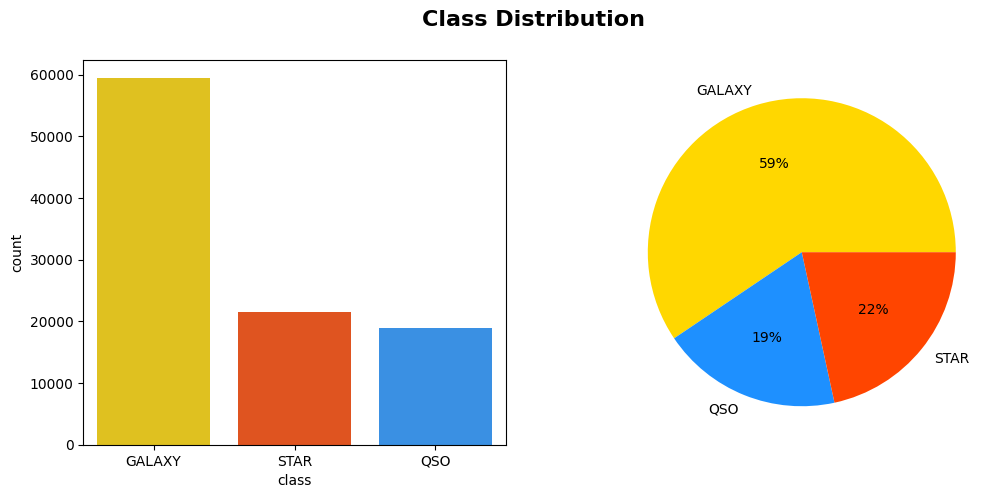

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Countplot
sns.countplot(data=data, x= data['class'], 
              # order the bars
              order= data['class'].value_counts().index,
              hue='class',
              ax=axes[0],
              palette=my_colors,
              legend=False)

# Pie Chart
data.groupby('class').size().plot(kind='pie', colors = my_colors, ax=axes[1], autopct='%.0f%%')

plt.suptitle('Class Distribution', 
             fontweight = 'heavy', fontsize = 16)

There is class imbalance

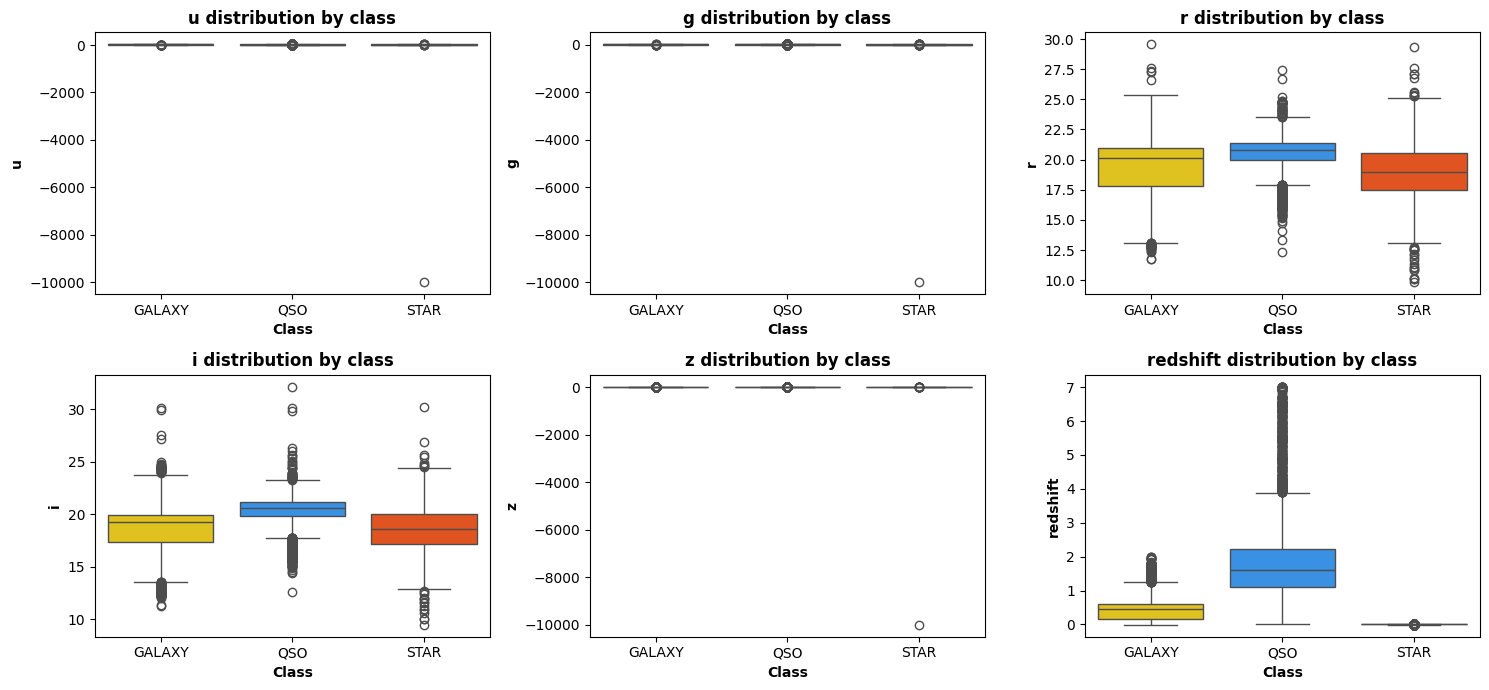

In [46]:
features = ['u', 'g', 'r', 'i', 'z', 'redshift']

# Create a figure with 2 columns and 3 rows (for 6 features)
fig, axes = plt.subplots(2, 3, figsize=(15, 7))
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easy iteration

for i, feature in enumerate(features):
    sns.boxplot(x='class', y=feature, data=data, palette=my_colors, hue='class', ax=axes[i])
    axes[i].set_title(f'{feature} distribution by class', fontweight = 'heavy', fontsize = 12)
    axes[i].set_xlabel('Class', fontweight = 'heavy')
    axes[i].set_ylabel(feature, fontweight = 'heavy')

plt.tight_layout()
plt.show()

From the above boxplots, it is clear that features  `u`, `g`, and `z` have one outlier value that belongs to the STAR class. Let's see where that outliers are located.

In [47]:
display(data[data['u'] == min(data['u'])][features + ['class']])

,u,g,r,i,z,redshift,class
79543,-9999.0,-9999.0,18.1656,18.01675,-9999.0,0.000089,STAR


In [48]:
display(data[data['g'] == min(data['u'])][features + ['class']])

,u,g,r,i,z,redshift,class
79543,-9999.0,-9999.0,18.1656,18.01675,-9999.0,0.000089,STAR


In [49]:
display(data[data['z'] == min(data['u'])][features + ['class']])

,u,g,r,i,z,redshift,class
79543,-9999.0,-9999.0,18.1656,18.01675,-9999.0,0.000089,STAR


A star should not have a valid `u` (or any other magnitude) value of -9999.0. 

We can remove the outlier index from the dataset. 


In [50]:
data = data.drop(index=[79543])
print("The shape of the dataset: {}".format(data.shape))

The shape of the dataset: (99999, 7)


Let's see the boxplots again

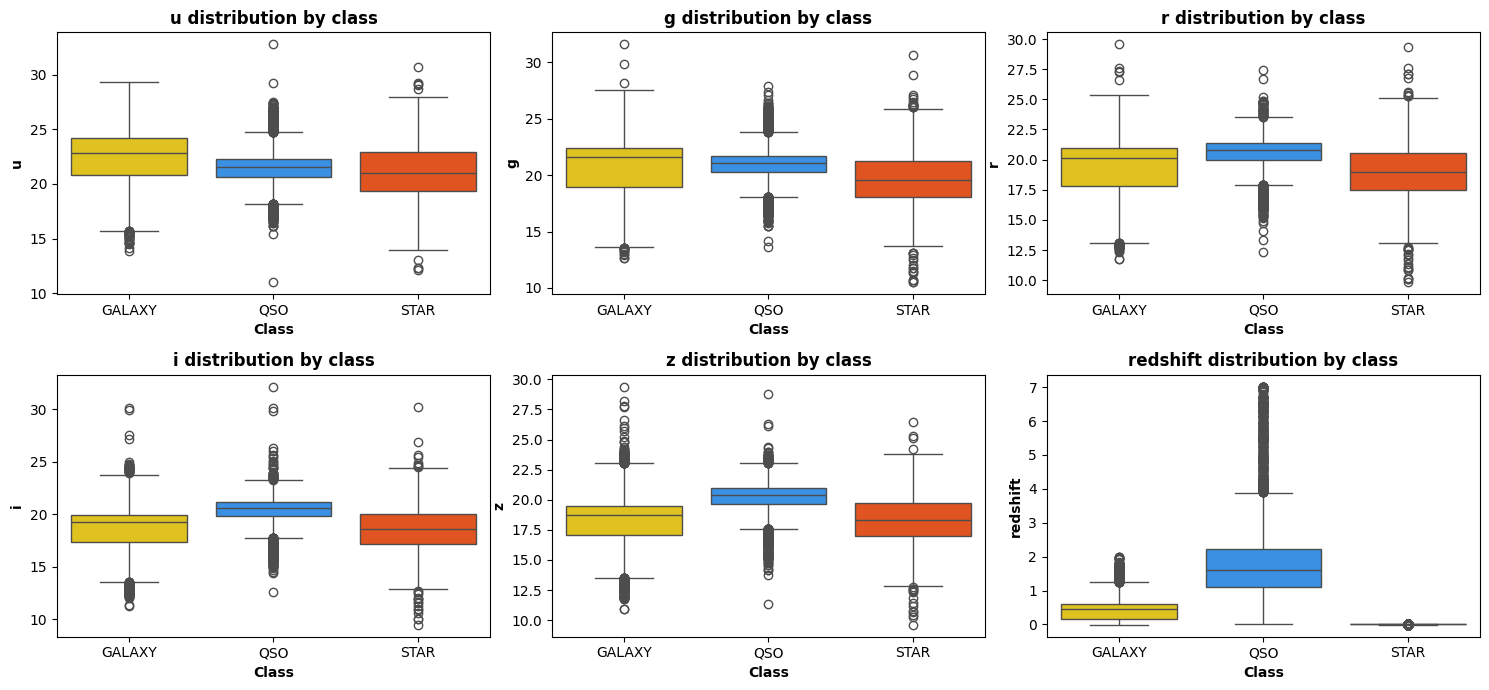

In [51]:
features = ['u', 'g', 'r', 'i', 'z', 'redshift']

# Create a figure with 2 columns and 3 rows (for 6 features)
fig, axes = plt.subplots(2, 3, figsize=(15, 7))
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easy iteration

for i, feature in enumerate(features):
    sns.boxplot(x='class', y=feature, data=data, palette=my_colors, hue='class', ax=axes[i])
    axes[i].set_title(f'{feature} distribution by class', fontweight = 'heavy', fontsize = 12)
    axes[i].set_xlabel('Class', fontweight = 'heavy')
    axes[i].set_ylabel(feature, fontweight = 'heavy')

plt.tight_layout()
plt.show()

* Without that one extreme outlier, the boxplots are now more informative, as the range of values for each class is better captured.
* The redshift values for the STAR class are almost 0.
* Some Quasars have extreme redshift values.

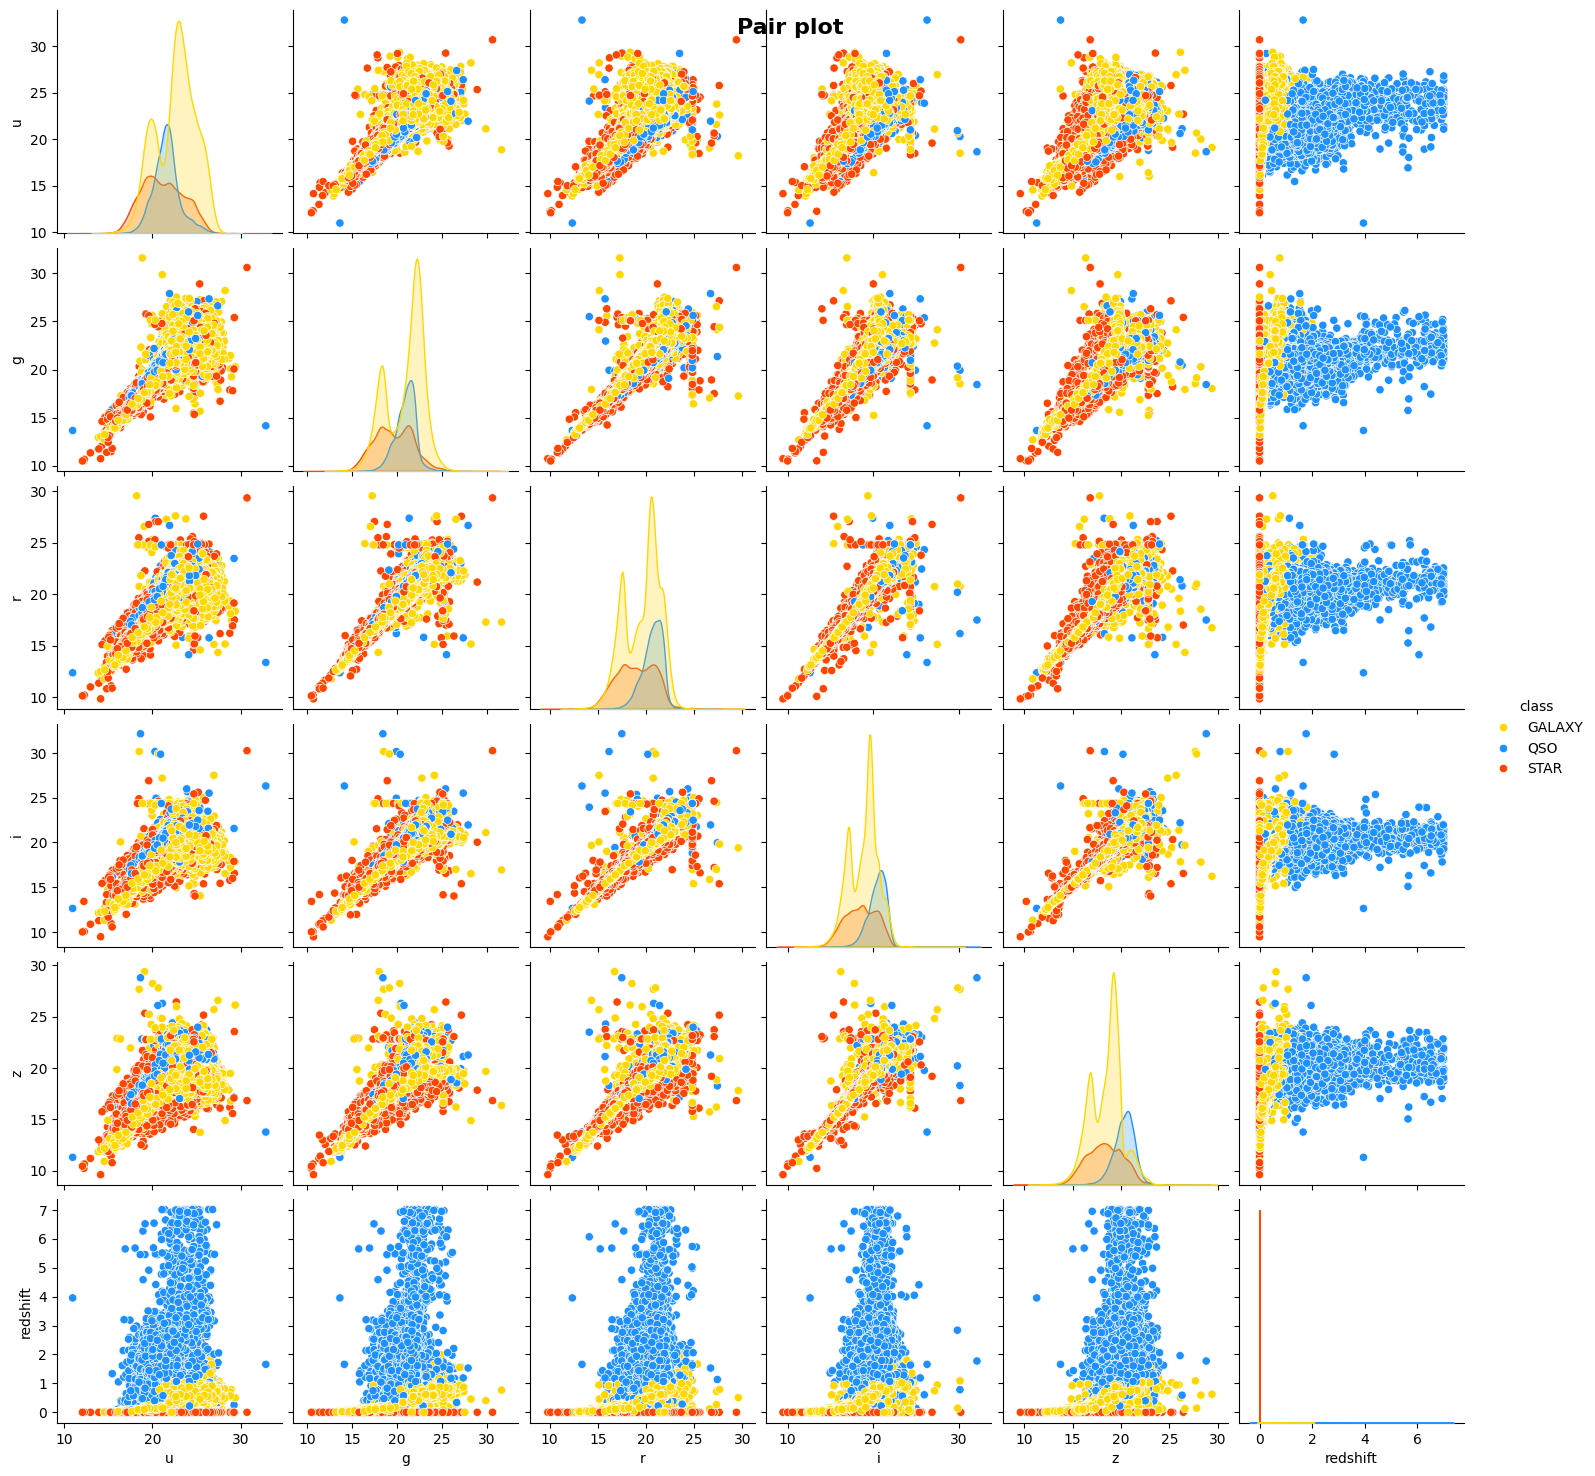

In [53]:
# pairplot
sns.pairplot(data=data, 
              hue='class',
              palette=my_colors,
              diag_kind='kde', 
              height=2.5)

plt.suptitle('Pair plot', 
             fontweight = 'heavy', fontsize = 16)
plt.show()

* redshift shows a clear separation of classes, especially for QSO, which has a distinct distribution compared to GALAXY and STAR.
* The u, g, r, i, and z features show overlapping distributions for all classes, but subtle differences are visible.

Now, let's correlation matrix of all the numerical features

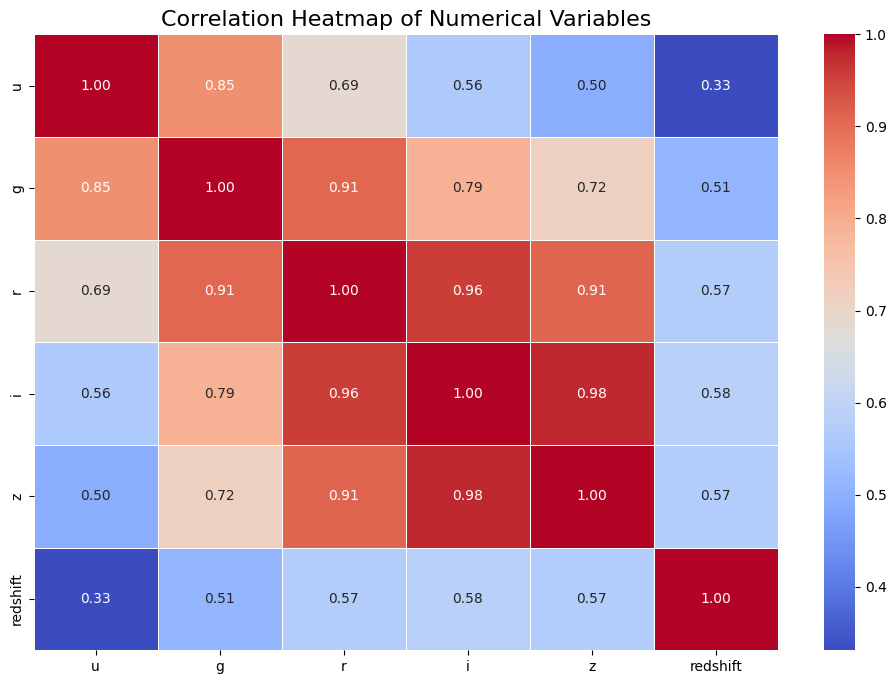

In [54]:
numerical_columns = data.select_dtypes(exclude=['object']).columns

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr(method="spearman")


# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()

* The features r, i, and z exhibit very high correlations with each other (0.91 to 0.98), indicating they are strongly linearly related. This might be expected as they represent magnitudes in similar bands.
* u and g also have a strong correlation (0.85).
* redshift has moderate correlations with other features - highest with i (0.58).

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99999 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   u         99999 non-null  float64
 1   g         99999 non-null  float64
 2   r         99999 non-null  float64
 3   i         99999 non-null  float64
 4   z         99999 non-null  float64
 5   class     99999 non-null  object 
 6   redshift  99999 non-null  float64
dtypes: float64(6), object(1)
memory usage: 6.1+ MB
